# 1 Imputation
-  1.1 traitement des outliers 
-  1.2 remplacer les valeurs manquantes par le KNNImputer

# 2 Analyse des données
- 2.1 Analyse univarié 
- 2.2 Analyse bivarié (corrélation des variables quantitatives)
- 2.3 Analyse multivarié
- 2.3.1 interprétation du cercle des corrélations et des individus projetés

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
data = pd.read_csv('Clenead/data.csv')

In [4]:
data

,BuildingType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999,1.0,2,97288,NaN,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1464,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
1465,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
1466,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
1467,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


In [5]:
data.columns

Index(['BuildingType', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

In [6]:
data.rename(columns={'BuildingType':'building_type', 'Latitude':'latitude', 'Longitude':'longitude', 'YearBuilt':'year_built',
       'NumberofBuildings':'number_buildings', 'NumberofFloors':'number_floors', 'PropertyGFATotal':'proprety_gfa_total',
       'ENERGYSTARScore':'energy_star_score', 'SiteEnergyUseWN(kBtu)':'site_energy_use_wn_kbtu', 'TotalGHGEmissions':'total_ghg_emissions'},inplace=True)

In [7]:
data

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999,1.0,2,97288,NaN,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1464,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
1465,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
1466,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
1467,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   building_type            1469 non-null   object 
 1   latitude                 1469 non-null   float64
 2   longitude                1469 non-null   float64
 3   year_built               1469 non-null   int64  
 4   number_buildings         1469 non-null   float64
 5   number_floors            1469 non-null   int64  
 6   proprety_gfa_total       1469 non-null   int64  
 7   energy_star_score        964 non-null    float64
 8   site_energy_use_wn_kbtu  1469 non-null   float64
 9   total_ghg_emissions      1469 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 114.9+ KB


In [9]:
data.describe()

,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1.469000e+03,964.000000,1.469000e+03,1469.000000
mean,47.615781,-122.332884,1959.961879,1.024506,3.032675,6.921803e+04,66.133817,3.554018e+06,75.337917
std,0.049978,0.025255,32.748212,0.443787,3.644864,7.754285e+04,27.972612,3.401993e+06,92.869351
min,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,1.000000,0.000000e+00,-0.800000
25%,47.581680,-122.344130,1929.000000,1.000000,1.000000,2.803200e+04,49.750000,1.181649e+06,17.310000
50%,47.612300,-122.332470,1963.000000,1.000000,2.000000,4.361500e+04,73.000000,2.246748e+06,41.960000
75%,47.651760,-122.320830,1988.000000,1.000000,4.000000,7.689300e+04,89.000000,4.899096e+06,92.920000
max,47.733870,-122.258640,2015.000000,6.000000,99.000000,1.400000e+06,100.000000,1.491342e+07,940.470000


### 1.1 Traitement des outliers

- Supprimer les bâtiments qui ne consomment pas d'energie
- Batiment négatif à supprimer
- Regarder l'attribut rename dans pandas et renommer en miniscule
- Supprimer les outliers var energy
- Energy/par la surface (viré les outliers superieur de ce feature)
- Creer deux modéles 
- Quelle est le bâtiment qui a le plus d'etage (76)
- PropertyGFATotal = PropertyGFAParking + PropertyGFABuilding(s)

In [10]:
idx = data.loc[data['number_floors'] == 0,:].index
data.drop(index = idx, inplace=True)


In [11]:
data.loc[data['number_floors'] == 0,:]

data = data.loc[data['number_floors'] < 76,:]

In [12]:
data.describe()

,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1.462000e+03,958.000000,1.462000e+03,1462.000000
mean,47.615691,-122.333067,1959.839945,1.024624,2.979480,6.922311e+04,66.213987,3.553301e+06,75.393516
std,0.049958,0.025133,32.742776,0.444845,2.646577,7.764268e+04,27.954418,3.406849e+06,93.039020
min,47.499170,-122.411820,1900.000000,0.000000,1.000000,1.128500e+04,1.000000,0.000000e+00,-0.800000
25%,47.581802,-122.344178,1929.000000,1.000000,1.000000,2.804200e+04,50.000000,1.181057e+06,17.295000
50%,47.612270,-122.332555,1963.000000,1.000000,2.000000,4.363000e+04,73.500000,2.242646e+06,41.920000
75%,47.651173,-122.320940,1987.000000,1.000000,4.000000,7.662925e+04,89.000000,4.894233e+06,92.917500
max,47.733870,-122.258640,2015.000000,6.000000,24.000000,1.400000e+06,100.000000,1.491342e+07,940.470000


In [13]:
data = data.loc[data['total_ghg_emissions']>0,:]

In [14]:
data = data.loc[data['number_buildings']>0,:]

In [15]:
data = data.loc[data['site_energy_use_wn_kbtu']>0,:]

In [16]:
data.sort_values('total_ghg_emissions',ascending = False)

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
910,NonResidential,47.60709,-122.32416,1951,1.0,1,47699,NaN,1.474522e+07,712.39
310,NonResidential,47.60613,-122.34115,1900,1.0,1,43728,NaN,1.185445e+07,611.19
9,NonResidential,47.60755,-122.33244,1922,1.0,11,92190,35.0,1.117920e+07,511.39
3,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
638,NonResidential,47.69875,-122.36725,1966,1.0,2,34636,3.0,1.280571e+07,480.90
...,...,...,...,...,...,...,...,...,...,...
1400,Nonresidential COS,47.54277,-122.31626,1906,1.0,2,39212,NaN,7.237040e+04,0.50
852,NonResidential,47.64418,-122.37587,1915,1.0,3,39952,NaN,5.811420e+04,0.40
749,NonResidential,47.60711,-122.33886,1900,1.0,3,49760,NaN,4.429350e+04,0.31
710,NonResidential,47.61119,-122.33581,1903,1.0,3,57720,NaN,2.410550e+04,0.17


### 1.2 Remplacement des valeurs manquantes (KNN imputer)

In [17]:
# KNN Imputer


# Le KNNImputer comble les valeurs manquantes 

from sklearn.impute import KNNImputer

inputer = KNNImputer(n_neighbors=5)

X = data.select_dtypes(np.number)

inputer.fit(X)

X = inputer.transform(X)

X = pd.DataFrame(X,columns=data.select_dtypes(np.number).columns)
X

,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,60.0,7.456910e+06,249.98
1,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,61.0,8.664479e+06,295.86
2,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,56.0,6.946800e+06,286.43
3,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,75.0,1.465650e+07,505.01
4,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,45.0,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...
1387,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,46.0,9.430032e+05,20.94
1388,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,75.4,1.053706e+06,32.17
1389,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,54.8,6.053764e+06,223.54
1390,47.52832,-122.32431,1989.0,1.0,1.0,14101.0,57.2,7.828413e+05,22.11


In [18]:
data = data.reset_index()
data

,index,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,60.0,7.456910e+06,249.98
1,1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,61.0,8.664479e+06,295.86
2,2,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,56.0,6.946800e+06,286.43
3,3,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,75.0,1.465650e+07,505.01
4,4,Nonresidential COS,47.61623,-122.33657,1999,1.0,2,97288,NaN,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...,...
1387,1464,Nonresidential COS,47.56722,-122.31154,1990,1.0,1,12294,46.0,9.430032e+05,20.94
1388,1465,Nonresidential COS,47.59625,-122.32283,2004,1.0,1,16000,NaN,1.053706e+06,32.17
1389,1466,Nonresidential COS,47.63644,-122.35784,1974,1.0,1,13157,NaN,6.053764e+06,223.54
1390,1467,Nonresidential COS,47.52832,-122.32431,1989,1.0,1,14101,NaN,7.828413e+05,22.11


In [19]:
data = pd.concat([data.select_dtypes(exclude=np.number),X],axis=1)
data

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,NonResidential,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,45.0,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1387,Nonresidential COS,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,46.0,9.430032e+05,20.94
1388,Nonresidential COS,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,75.4,1.053706e+06,32.17
1389,Nonresidential COS,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,54.8,6.053764e+06,223.54
1390,Nonresidential COS,47.52832,-122.32431,1989.0,1.0,1.0,14101.0,57.2,7.828413e+05,22.11


In [20]:
data.describe()

,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1.392000e+03,1392.000000
mean,47.615327,-122.332939,1959.582615,1.057471,2.946121,67786.897989,65.040230,3.593194e+06,74.808333
std,0.049957,0.025091,32.822667,0.416588,2.519366,68914.912831,24.719927,3.410672e+06,90.667403
min,47.499170,-122.411820,1900.000000,1.000000,1.000000,11285.000000,1.000000,1.726000e+04,0.120000
25%,47.580400,-122.343777,1928.000000,1.000000,1.000000,27828.500000,50.500000,1.208396e+06,17.440000
50%,47.612220,-122.332480,1963.000000,1.000000,2.000000,43191.500000,68.800000,2.250040e+06,41.960000
75%,47.651142,-122.321000,1987.000000,1.000000,4.000000,76132.000000,85.000000,4.920007e+06,92.467500
max,47.733870,-122.258640,2015.000000,6.000000,22.000000,706176.000000,100.000000,1.491342e+07,712.390000


In [64]:
data

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,NonResidential,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,45.0,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1387,Nonresidential COS,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,46.0,9.430032e+05,20.94
1388,Nonresidential COS,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,75.4,1.053706e+06,32.17
1389,Nonresidential COS,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,54.8,6.053764e+06,223.54
1390,Nonresidential COS,47.52832,-122.32431,1989.0,1.0,1.0,14101.0,57.2,7.828413e+05,22.11


<AxesSubplot:xlabel='year_built'>

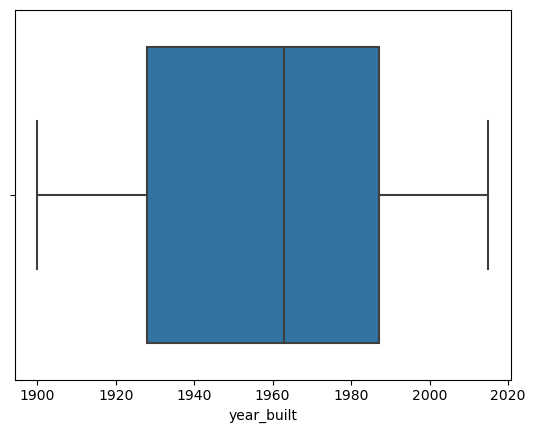

In [63]:
sns.boxplot(data = data, x = 'year_built', hue = 'building_type')

In [22]:
#data.boxplot(column='PropertyGFATotal')

In [23]:
data

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,NonResidential,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,45.0,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1387,Nonresidential COS,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,46.0,9.430032e+05,20.94
1388,Nonresidential COS,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,75.4,1.053706e+06,32.17
1389,Nonresidential COS,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,54.8,6.053764e+06,223.54
1390,Nonresidential COS,47.52832,-122.32431,1989.0,1.0,1.0,14101.0,57.2,7.828413e+05,22.11


In [24]:
data.loc[data['energy_star_score'] == 1,:]


,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
433,NonResidential,47.53935,-122.34402,1970.0,1.0,1.0,70400.0,1.0,1.412886e+07,284.01
447,NonResidential,47.54137,-122.33051,1976.0,1.0,1.0,44100.0,1.0,1.692054e+06,11.29
628,NonResidential,47.61063,-122.32741,1946.0,1.0,3.0,22667.0,1.0,4.141811e+06,148.55
691,NonResidential,47.62799,-122.33132,1926.0,1.0,1.0,37740.0,1.0,7.419337e+06,73.48
699,NonResidential,47.62038,-122.33759,1928.0,1.0,3.0,41466.0,1.0,9.228577e+06,234.03
776,NonResidential,47.61010,-122.30838,1901.0,1.0,2.0,26560.0,1.0,1.831347e+06,64.88
801,NonResidential,47.66238,-122.38831,1974.0,1.0,1.0,25600.0,1.0,1.943595e+06,34.26
968,NonResidential,47.70440,-122.32285,1986.0,1.0,2.0,28385.0,1.0,2.654316e+06,18.50
1082,NonResidential,47.57339,-122.33735,1964.0,1.0,1.0,33462.0,1.0,1.386445e+06,9.67
1143,NonResidential,47.61318,-122.32747,1969.0,1.0,6.0,95117.0,1.0,7.437745e+06,183.79


### 2.1 Analyse univarié

Text(0.5, 1.0, 'total_ghg_emissions')

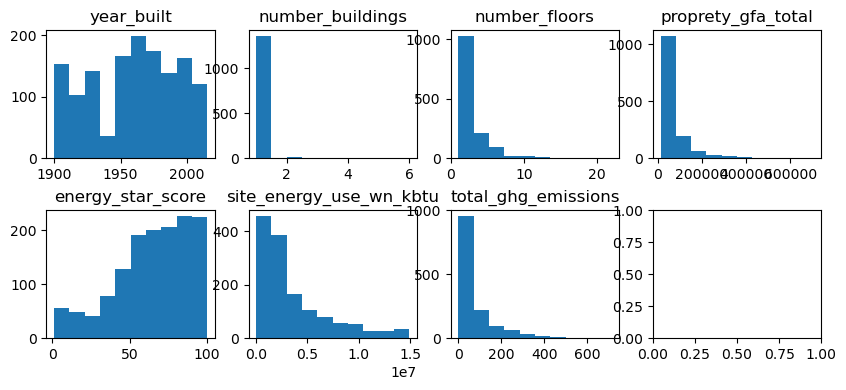

In [25]:
fig, ax = plt.subplots(2,4,figsize= (10,4))
fig.subplots_adjust(hspace=0.4)
ax[0][0].hist(data['year_built'])
ax[0][0].set_title('year_built')
ax[0][1].hist(data['number_buildings'])
ax[0][1].set_title('number_buildings')
ax[0][2].hist(data['number_floors'])
ax[0][2].set_title('number_floors')
ax[0][3].hist(data['proprety_gfa_total'])
ax[0][3].set_title('proprety_gfa_total')
ax[1][0].hist(data['energy_star_score'])
ax[1][0].set_title('energy_star_score')
ax[1][1].hist(data['site_energy_use_wn_kbtu'])
ax[1][1].set_title('site_energy_use_wn_kbtu')
ax[1][2].hist(data['total_ghg_emissions'])
ax[1][2].set_title('total_ghg_emissions')


### 2.2 Analyse bivarié (matrice de corrélation)

<AxesSubplot:>

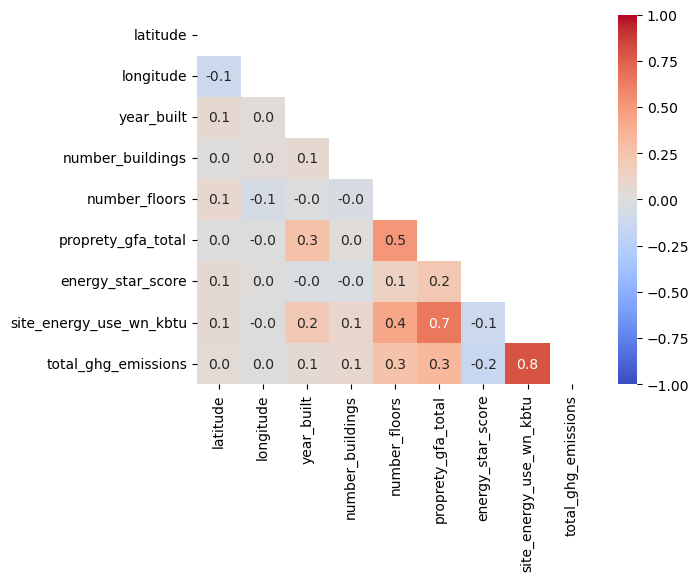

In [26]:
corr = data.corr()
mask = np.triu(corr)

sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)

### 2.3 Analyse multivarié (ACP)

In [27]:
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
data.columns


Index(['building_type', 'latitude', 'longitude', 'year_built',
       'number_buildings', 'number_floors', 'proprety_gfa_total',
       'energy_star_score', 'site_energy_use_wn_kbtu', 'total_ghg_emissions'],
      dtype='object')

In [29]:
cols = ['latitude', 'longitude', 'year_built',
       'number_buildings', 'number_floors', 'proprety_gfa_total',
       ]

In [30]:
X = data.loc[:,cols]
X

,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total
0,47.61220,-122.33799,1927.0,1.0,12.0,88434.0
1,47.61317,-122.33393,1996.0,1.0,11.0,103566.0
2,47.61412,-122.33664,1926.0,1.0,10.0,61320.0
3,47.61375,-122.34047,1980.0,1.0,18.0,175580.0
4,47.61623,-122.33657,1999.0,1.0,2.0,97288.0
...,...,...,...,...,...,...
1387,47.56722,-122.31154,1990.0,1.0,1.0,12294.0
1388,47.59625,-122.32283,2004.0,1.0,1.0,16000.0
1389,47.63644,-122.35784,1974.0,1.0,1.0,13157.0
1390,47.52832,-122.32431,1989.0,1.0,1.0,14101.0


<AxesSubplot:>

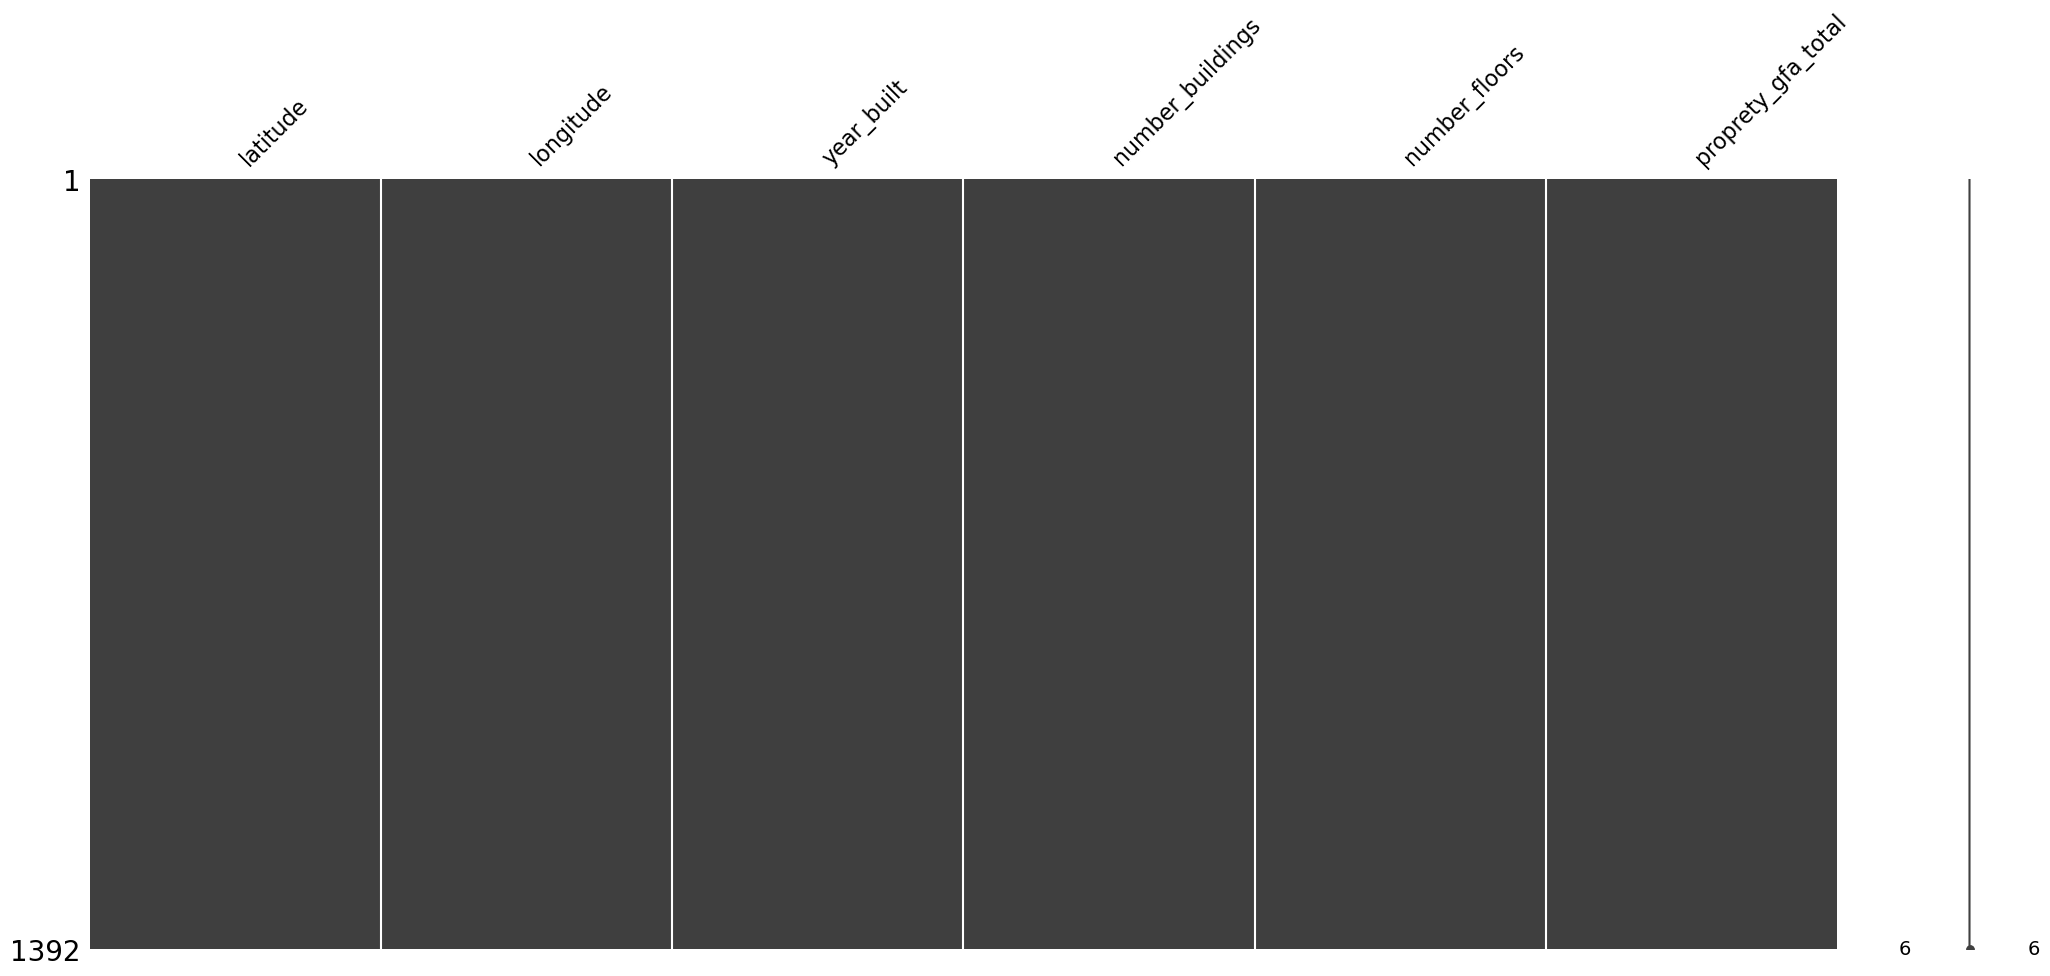

In [31]:
msno.matrix(X)

In [32]:
X = X.dropna()

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.06261188, -0.20137823, -0.99304316, -0.13800654,  3.59500557,
         0.29971049],
       [-0.04318803, -0.03950854,  1.10991813, -0.13800654,  3.19793759,
         0.51936452],
       [-0.02416466, -0.14755456, -1.02352086, -0.13800654,  2.80086961,
        -0.0938726 ],
       ...,
       [ 0.42278427, -0.99278546,  0.43940873, -0.13800654, -0.77274221,
        -0.79300008],
       [-1.74227481,  0.34403491,  0.89657423, -0.13800654, -0.77274221,
        -0.77929711],
       [-1.52060256,  1.49825352, -0.65778846, -0.13800654, -0.77274221,
        -0.71895467]])

In [34]:
data

,building_type,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total,energy_star_score,site_energy_use_wn_kbtu,total_ghg_emissions
0,NonResidential,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,60.0,7.456910e+06,249.98
1,NonResidential,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,61.0,8.664479e+06,295.86
2,NonResidential,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,56.0,6.946800e+06,286.43
3,NonResidential,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,75.0,1.465650e+07,505.01
4,Nonresidential COS,47.61623,-122.33657,1999.0,1.0,2.0,97288.0,45.0,1.258171e+07,301.81
...,...,...,...,...,...,...,...,...,...,...
1387,Nonresidential COS,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,46.0,9.430032e+05,20.94
1388,Nonresidential COS,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,75.4,1.053706e+06,32.17
1389,Nonresidential COS,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,54.8,6.053764e+06,223.54
1390,Nonresidential COS,47.52832,-122.32431,1989.0,1.0,1.0,14101.0,57.2,7.828413e+05,22.11


In [35]:
n_components = 6

In [36]:
pca = PCA(n_components=n_components)

In [37]:
pca.fit(X_scaled)

PCA(n_components=6)

In [38]:
pca.explained_variance_ratio_

array([0.26470364, 0.18732812, 0.17956663, 0.15494437, 0.14559422,
       0.06786302])

In [39]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([26.47, 18.73, 17.96, 15.49, 14.56,  6.79])

In [40]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 26.,  45.,  63.,  79.,  93., 100.])

In [41]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

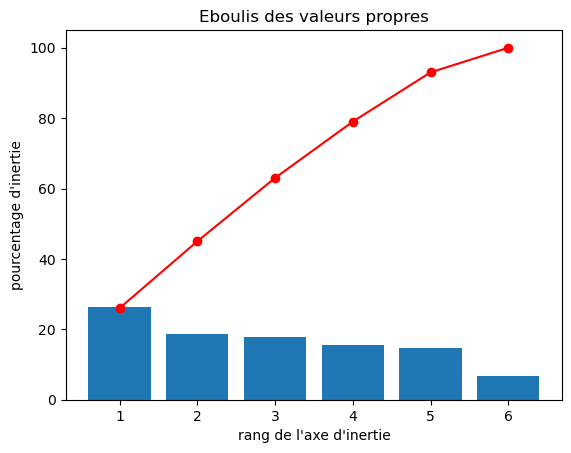

In [42]:
# ce graphique représente l'inertie totale sur les 6 axes principaux

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [43]:
# La méthode des "batons brisés" permet de selectionner les axes
# qui serait interessant pour l'interprétation des résultats de l'ACP
# elle propose de calculer un seuil théorique par axe et de comparer les inerties des axes avec ces seuils.

b_i = 1/np.arange(7,1,-1)
cumul_b_i = np.cumsum(b_i)
cumul_b_i = cumul_b_i[::-1]
pd.DataFrame({'val propre':pca.explained_variance_ratio_,'Seuils':cumul_b_i})

,val propre,Seuils
0,0.264704,1.592857
1,0.187328,1.092857
2,0.179567,0.759524
3,0.154944,0.509524
4,0.145594,0.309524
5,0.067863,0.142857


In [44]:
pcs = pca.components_
pcs

array([[ 0.13994468, -0.0858615 ,  0.31540046,  0.01903769,  0.62634917,
         0.69346241],
       [-0.43867426,  0.64844515,  0.39983657,  0.42235545, -0.17567861,
         0.13404251],
       [ 0.58724143, -0.27754651,  0.47925421,  0.49785994, -0.29393773,
        -0.11902494],
       [-0.03787109, -0.06770992, -0.59832479,  0.74721678,  0.27866645,
        -0.0008215 ],
       [ 0.65465178,  0.70025172, -0.20581157, -0.11970764,  0.13798457,
        -0.07314726],
       [ 0.11456316, -0.01332376, -0.3325924 , -0.02694586, -0.62747878,
         0.69399161]])

In [45]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,0.139945,-0.085861,0.315400,0.019038,0.626349,0.693462
1,-0.438674,0.648445,0.399837,0.422355,-0.175679,0.134043
2,0.587241,-0.277547,0.479254,0.497860,-0.293938,-0.119025
3,-0.037871,-0.067710,-0.598325,0.747217,0.278666,-0.000822
4,0.654652,0.700252,-0.205812,-0.119708,0.137985,-0.073147
5,0.114563,-0.013324,-0.332592,-0.026946,-0.627479,0.693992


In [46]:
pcs.columns = cols
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,latitude,longitude,year_built,number_buildings,number_floors,proprety_gfa_total
F1,0.14,-0.09,0.32,0.02,0.63,0.69
F2,-0.44,0.65,0.40,0.42,-0.18,0.13
F3,0.59,-0.28,0.48,0.50,-0.29,-0.12
F4,-0.04,-0.07,-0.60,0.75,0.28,-0.00
F5,0.65,0.70,-0.21,-0.12,0.14,-0.07
F6,0.11,-0.01,-0.33,-0.03,-0.63,0.69


In [47]:
pcs.T

,F1,F2,F3,F4,F5,F6
latitude,0.139945,-0.438674,0.587241,-0.037871,0.654652,0.114563
longitude,-0.085861,0.648445,-0.277547,-0.067710,0.700252,-0.013324
year_built,0.315400,0.399837,0.479254,-0.598325,-0.205812,-0.332592
number_buildings,0.019038,0.422355,0.497860,0.747217,-0.119708,-0.026946
number_floors,0.626349,-0.175679,-0.293938,0.278666,0.137985,-0.627479
proprety_gfa_total,0.693462,0.134043,-0.119025,-0.000822,-0.073147,0.693992


<AxesSubplot:>

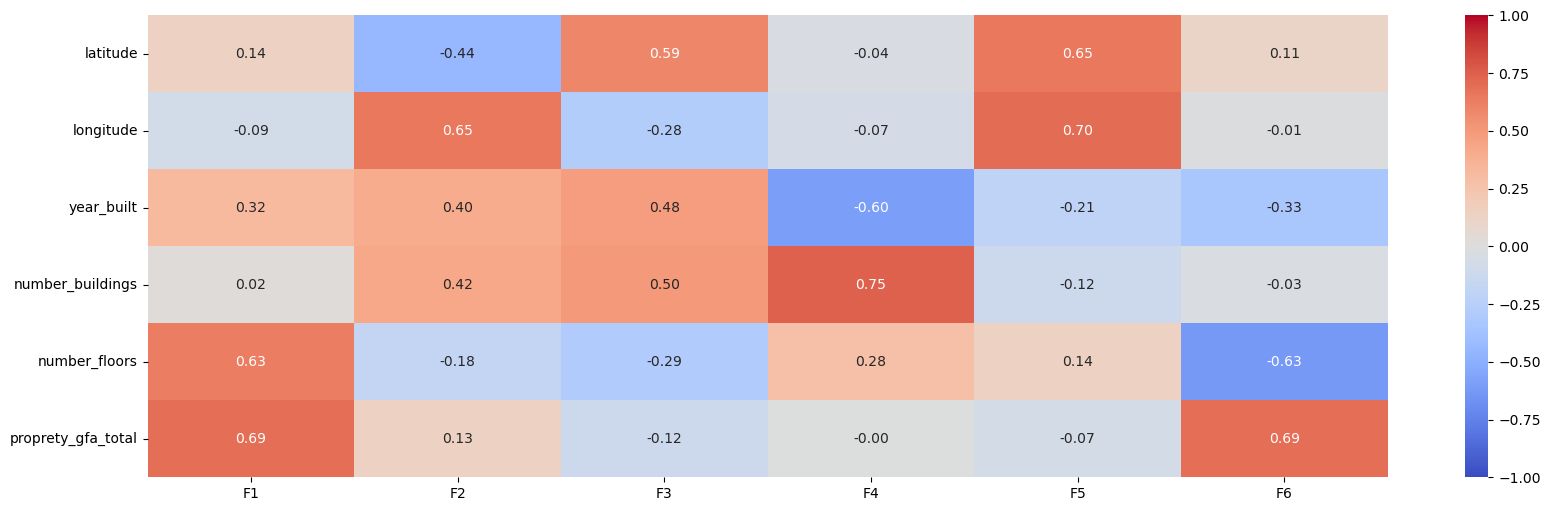

In [48]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [49]:
x, y = 0,1

In [50]:
def cercle_corelation(pca,x,y):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 pca.components_[x, i],  #0 for PC1
                 pca.components_[y, i],  #1 for PC2
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02,              )

        plt.text(pca.components_[0, i] + 0.05,
                 pca.components_[1, i] + 0.05,
                 features[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)


In [51]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        #plt.text(pca.components_[x, i] + 0.05, pca.components_[y, i] + 0.05, fontsize='14', horizontalalignment='center',verticalalignment='center')
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [52]:
X_proj = pca.transform(X_scaled)
X_proj.shape
pcs_pi = pd.DataFrame(X_proj,columns=pcs.index)
pcs_pi[pcs_pi['F1']>1]

,F1,F2,F3,F4,F5,F6
0,2.152262,-1.149851,-1.617885,1.508609,0.513028,-1.718286
1,2.707975,-0.113368,-0.552983,0.127830,0.135423,-2.016056
2,1.373066,-1.057245,-1.344580,1.300769,0.501371,-1.479301
3,5.044016,-0.830693,-1.648914,1.210502,0.367862,-2.867666
5,1.826426,-0.984370,-1.543512,1.401041,0.636618,-1.512499
...,...,...,...,...,...,...
1364,4.055157,-0.007675,-0.670203,0.106611,0.219498,-2.535313
1365,6.969224,0.546490,-0.896378,-0.084807,-0.377227,1.373672
1368,7.009243,0.553642,-0.872669,-0.103962,-0.371024,1.393369
1369,7.764466,0.727961,-1.162334,0.008560,-0.204526,1.687904


In [53]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[8,7], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            print(labels[i])
            plt.text(_x, _y+0.05, labels[i], fontsize='14', horizontalalignment='center',verticalalignment='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



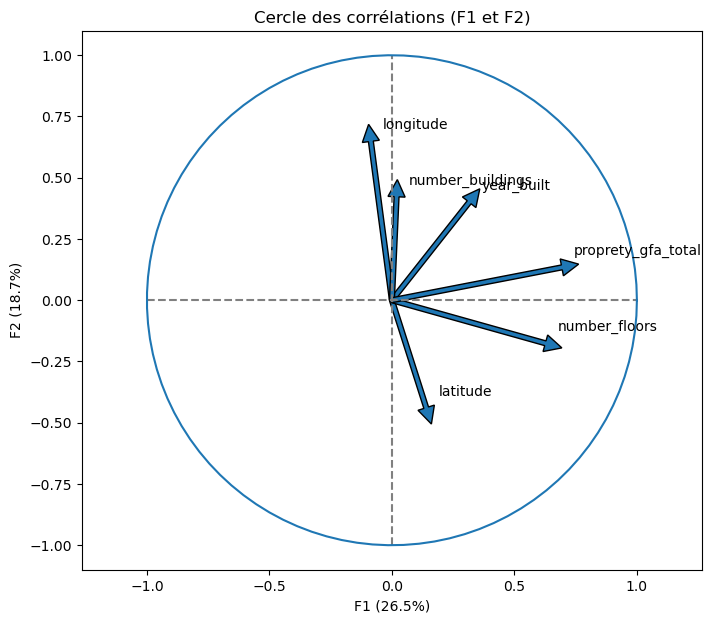

In [54]:

x, y = 0,1

correlation_graph(pca,(x,y),cols)

Suite à l'analyse :

- les variables proprety et number_floor à prendre pour la prédiction de la consommation d'energie
- les variables longitude et latitude pour la prédiction de la consommation d'energie

In [60]:
X_proj

array([[ 2.15226156, -1.14985092, -1.6178853 ,  1.50860926,  0.51302809,
        -1.71828573],
       [ 2.70797503, -0.1133679 , -0.55298317,  0.12782962,  0.13542337,
        -2.01605635],
       [ 1.3730665 , -1.0572453 , -1.34457991,  1.30076866,  0.50137142,
        -1.47930148],
       ...,
       [-0.75355134, -0.68236908,  0.98722601, -0.5295057 , -0.54095893,
        -0.14621822],
       [-1.01762854,  1.31886957, -0.4377487 , -0.81157326, -1.11730022,
        -0.55460574],
       [-1.53411113,  1.35667253, -1.38004004,  0.03184388,  0.15155341,
         0.01425757]])

In [55]:
df2 = pd.DataFrame(X_proj,columns=['F1','F2','F3','F4','F5','F6'])
df2['building_type'] = data['building_type']

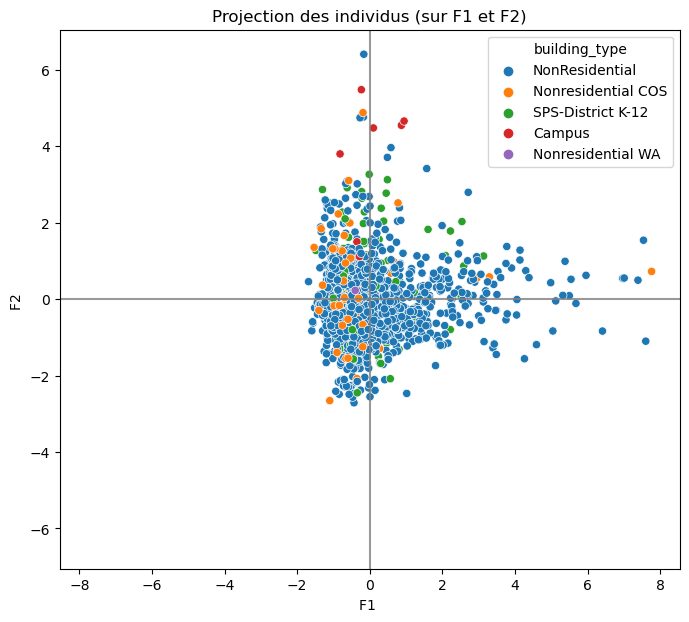

In [56]:
display_factorial_planes(df2,(0,1),clusters = df2['building_type'])

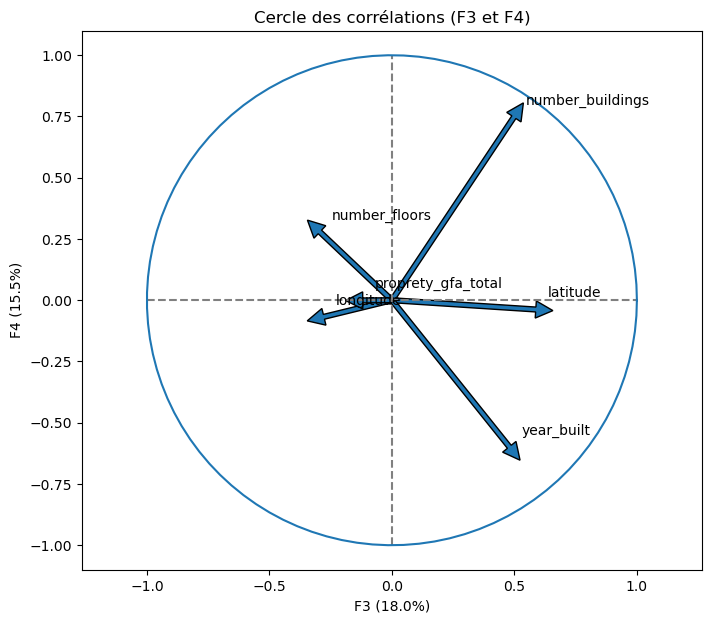

In [57]:
x, y = 2,3

correlation_graph(pca,(x,y),cols)

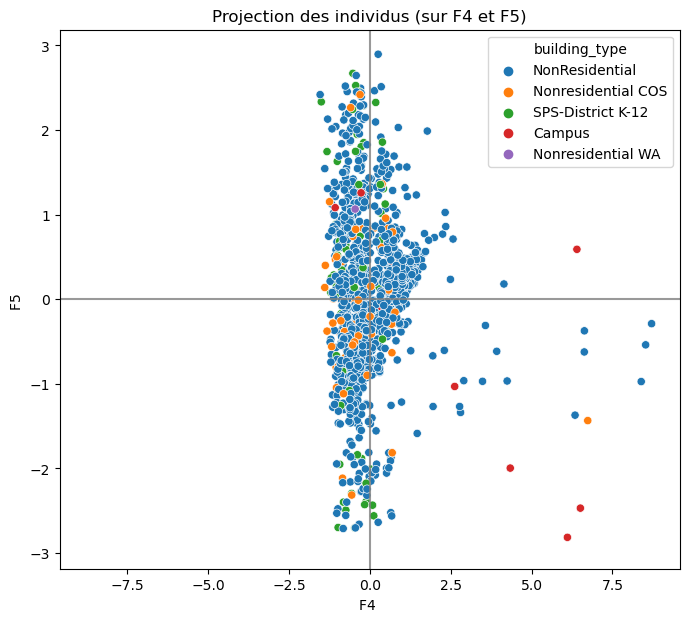

In [58]:
display_factorial_planes(df2,(3,4),clusters = df2['building_type'])

In [59]:
data.to_csv('Clenead/data2.csv',index= False)